In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
dfx=pd.read_csv('Linear_X_Train.csv')
dfy=pd.read_csv('Linear_Y_Train.csv')

x=dfx.values #into a numpy array format
y=dfy.values
#print(x)
#print(y)
#print(dfx)

print(x.shape)
print(y.shape)

(3750, 1)
(3750, 1)


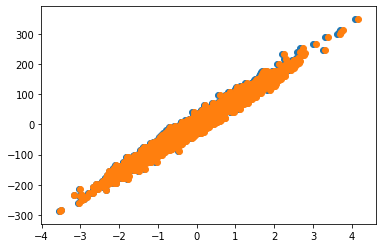

In [42]:
plt.scatter(x,y)
X=(x-x.mean())/x.std()
Y=y
#normalise data
#The goal of normalization is to change the values of numeric 
#columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, 
#every dataset does not require normalization. It is required only when features have different ranges.
#print(X)
plt.scatter(X,Y) #orange,close data
plt.show()

In [43]:
def hypothesis(x,theta):
    return theta[0]+theta[1]*x #x is some scalar

def error(X,Y,theta):
    m=X.shape[0]
    error=0
    
    for i in range(m):
        hx=hypothesis(X[i],theta) #going over all points Xi
        error+=(hx-Y[i])**2

    return error

def gradient(X,Y,theta):
    grad=np.zeros((2,))
    m=X.shape[0]
    for i in range(m):
        hx=hypothesis(X[i],theta)
        grad[0]+=(hx-Y[i])
        grad[1]+=(hx-Y[i])*X[i]
        
    return grad

##Algorithm
def gradientDescent(X,Y,learning_rate=0.0001):  #threshold=): 
    theta=np.zeros((2,))
    #for 3d plot of grad
    #theta=np.array([-2.0,0.0]) 
    itr=0 #no of iterations                    
    max_itr=100                                
    
    error_list=[]
    theta_list=[]
    
    while(itr<=max_itr):       #while(delta_error>=0.001)
        grad=gradient(X,Y,theta) #new theta val jayegi check aage ke steps
        e=error(X,Y,theta)
        error_list.append(e)
        theta_list.append((theta[0],theta[1])) #either as a tuple like here or array (theta])
        theta[0]=theta[0]-learning_rate*grad[0]
        theta[1]=theta[1]-learning_rate*grad[1]
        itr+=1
        
    return theta,error_list,theta_list
    


In [44]:
final_theta, error_list,theta_list=gradientDescent(X,Y)

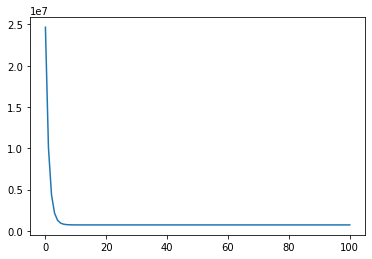

In [45]:
plt.plot(error_list)
plt.show() 

In [46]:
print(final_theta)

[ 0.68386897 79.90573694]


In [47]:
dtx=pd.read_csv('Linear_X_Test.csv')
xtest=dtx.values
print(xtest)

[[-1.87794441]
 [-0.86903192]
 [-2.53018243]
 ...
 [ 0.12800782]
 [-0.27803759]
 [-0.68042543]]


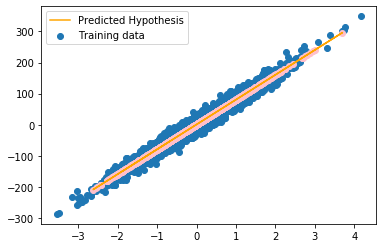

In [48]:
plt.scatter(X,Y,label='Training data')
plt.plot(xtest,hypothesis(xtest,final_theta),color='orange',label='Predicted Hypothesis')
plt.legend()
plt.scatter(xtest,hypothesis(xtest,final_theta),color='pink',label='Predicted Hypothesis') #line ke jo points hai vo
plt.show()

In [58]:
arr=hypothesis(xtest,final_theta)

In [59]:
import csv
with open('results.csv','w',newline='') as f:
    fwriter=csv.writer(f)
    fwriter.writerow(['y'])
    for i in range(xtest.shape[0]):
        fwriter.writerow(hypothesis(xtest[i],final_theta))

In [62]:
print(xtest.shape)

(1250, 1)


In [63]:
print(arr.shape)

(1250, 1)
